# Антонов Алексей <h1> 
# Вариант 1 <h5>

In [275]:
import numpy as np
from math import cos, sin, pi, pow
import matplotlib.pyplot as plt
import scipy.linalg as sp


<img src="2.jpg"/>
<img src="1.jpg"/>

In [276]:
A = np.matrix([[79.2, 0, 35, 19.8, 24], [39.6, 85, 0, 19.8, 25], [19.8, -15, 45, 0, 10], [49.5, 18, 20, 89.1, 0], [9.9, 15, 20, -49.5, 95]])
b = np.array([86, 55, 77, 5, -64])

In [277]:
#Задача 4.1
#1. Решим через стандартую библиотечную функцию numpy
x1 = np.linalg.solve(A, b)
x1

array([ 1.11111111,  1.        ,  2.        , -1.21212121, -2.        ])

In [278]:
#2. Преобразуем систему Ax=b к виду x=Bx+c, удобному для итераций
gen = lambda i, j, A: -A[i, j] / A[i, i] if j != i else 0

B = np.asarray([ [ gen(i, j, A) for j in range(A.shape[0])] for i in range(A.shape[0]) ])
c = np.asarray([ b[i] / A[i, i] for i in range(A.shape[0]) ])

print(np.asmatrix(B))
print(c)

# Достаточное условие сходимости итерационных методов
print('Достаточное условие сходимости итерационных методов')
print(np.linalg.norm(B, ord=np.inf), ' < 1')

[[ 0.         -0.         -0.44191919 -0.25       -0.3030303 ]
 [-0.46588235  0.         -0.         -0.23294118 -0.29411765]
 [-0.44        0.33333333  0.         -0.         -0.22222222]
 [-0.55555556 -0.2020202  -0.22446689  0.         -0.        ]
 [-0.10421053 -0.15789474 -0.21052632  0.52105263  0.        ]]
[ 1.08585859  0.64705882  1.71111111  0.05611672 -0.67368421]
Достаточное условие сходимости итерационных методов
0.9955555555555555  < 1


In [279]:
#3. Метод Зейделя
def seidel(_B, _c, _x, iterations = 10, eps = 1e-6):
    for i in range (1, iterations + 1):
        temp_x = _x
        _x = np.dot(_B, temp_x) + _c
        if np.linalg.norm(_x - temp_x, ord = np.inf) < eps:
            return _x, i
    return _x, i

In [280]:
#4. Начальное приближение нулевым вектором
x2, i = seidel(B, c, np.zeros(c.shape))
print('Gauss x =', x1)
print('Seidel x with zero vector =', x2, ', iterations = ', i)
print('Norm with zero vector = ', np.linalg.norm(x1 - x2, ord=np.inf))

#5. Другое начальное приближение
x3, i = seidel(B, c, np.array([10, 10, 10, 10, 10]))
print('Seidel x with [10, 10, 10, 10, 10] vector =', x3, ', iterations = ', i)
print('Norm with [10, 10, 10, 10, 10] vector = ', np.linalg.norm(x1 - x3, ord=np.inf))

# Первый случай точнее, так как взято более близкое начальное приближение

Gauss x = [ 1.11111111  1.          2.         -1.21212121 -2.        ]
Seidel x with zero vector = [ 1.10202626  1.00212887  2.00114403 -1.20036281 -1.99471681] , iterations =  10
Norm with zero vector =  0.011758399954981735
Seidel x with [10, 10, 10, 10, 10] vector = [ 1.10696407  0.98825508  2.05350676 -1.22745758 -1.93243189] , iterations =  10
Norm with [10, 10, 10, 10, 10] vector =  0.06756811195307577


In [281]:
#Задача 4.2
x4, i = seidel(B, c, np.zeros(c.shape), iterations = 1000)
print('Gauss x =', x1)
print('Seidel x with zero vector =', x4, ', iterations = ', i)
print('Norm with zero vector = ', np.linalg.norm(x1 - x2, ord=np.inf))

Gauss x = [ 1.11111111  1.          2.         -1.21212121 -2.        ]
Seidel x with zero vector = [ 1.11111054  1.00000052  2.00000099 -1.21212107 -1.99999995] , iterations =  28
Norm with zero vector =  0.011758399954981735


<img src="3.jpg"/>
<img src="4.jpg"/>

[0.6        0.65901699 0.93778525 1.15901699 1.30105652 1.35
 1.30105652 1.15901699 0.93778525 0.65901699 0.6       ]
[1 2 1]


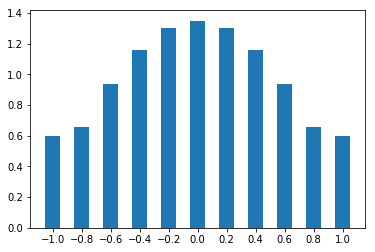

Seidel x = [2.13204346 2.96972865 1.85281578] , iterations =  16


In [282]:
#Задача 4.4
B = lambda t: np.array([[0.2, 0.3, -0.1], 
                   [0.1, -0.25, cos(0.5 * pi * t)],
                   [sin(10 * pi * t), 0.1, 0.3]]) 
B_norms = np.asarray([ np.linalg.norm(B(t / 10), ord=np.inf) for t in range (-10, 11, 2) ])
c_new = np.array([1, 2, 1])
t = np.arange(-1, 1.1, 0.2)

print(B_norms)
print(c_new)
plot = plt.gca()
plot.bar(t, B_norms, width=0.1)
plot.set_xticks(t)
plt.show()

#Соотв-но, берем t = 0.4
x5, i = seidel(B(0.4), c_new, np.zeros(c_new.shape), iterations = 1000, eps = 1e-5)
print('Seidel x =', x5, ', iterations = ', i)

<img src="5.jpg"/>
<img src="6.jpg"/>

In [283]:
#Задача 4.9
n = 50
A = 1000 * np.eye(n, n) + 350 * np.eye(n, n, k = 1) + 75 * np.eye(n, n, k = 8) 
b = np.array([pow(i, 3) for i in range(1, n + 1)])
A[:9, :9], b[:9]

(array([[1000.,  350.,    0.,    0.,    0.,    0.,    0.,    0.,   75.],
        [   0., 1000.,  350.,    0.,    0.,    0.,    0.,    0.,    0.],
        [   0.,    0., 1000.,  350.,    0.,    0.,    0.,    0.,    0.],
        [   0.,    0.,    0., 1000.,  350.,    0.,    0.,    0.,    0.],
        [   0.,    0.,    0.,    0., 1000.,  350.,    0.,    0.,    0.],
        [   0.,    0.,    0.,    0.,    0., 1000.,  350.,    0.,    0.],
        [   0.,    0.,    0.,    0.,    0.,    0., 1000.,  350.,    0.],
        [   0.,    0.,    0.,    0.,    0.,    0.,    0., 1000.,  350.],
        [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0., 1000.]]),
 array([  1.,   8.,  27.,  64., 125., 216., 343., 512., 729.]))

In [284]:
def Iteration_method(A, b, x = b, eps=1e-9):
    P = np.diag(A) * np.eye(n)
    for i in range(10000):
        r = b - A.dot(x)
        z = sp.solve_triangular(P, r, lower=True)
        x = x + z
        if np.linalg.norm(z - x, ord=np.inf) < eps:
            return x
    return x
np.linalg.norm(Iteration_method(A, b) - np.linalg.solve(A, b), ord = np.inf)

1.4210854715202004e-14